# Scikit-learn
## Overview

Scikit learn is a free open source machine learning library for the Python programming language. It offers both supervised and unsupervised learning algorithms while being focused on modelling data. Scikit learn includes the following set of libraries that can be utilised without the need of installing extra content as it is built on the SciPy.

- NumPy
- SciPy
- Matplotlib
- IPython
- Pandas

## Supervised Learning  
Information found at https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning

Supervised learning is a specific approach to machine learning that is defined b its use of datasets. They are designed to train algorithms to classify and predict outcomes with great accuracy using labled datasets. Below are the two types of algorithms that fall under supervised learning
- Classification
- Regression



## Unsupervised Learning

Unsupervised learning is another approach to machine learning that analyses and clusters unlabled datasets. They are particularily helpful at finding hidden patters throughout datasets without the need of human intervention. Below are the three types of algorithms that fall under unsupervised learning.

- Clustering
- Association
- Dimensionality reduction

## Classification: Bank Note Authentication Dataset

Dataset can be found at https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

In [1]:
# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neaighbours
import sklearn.neighbors as nei

# Helper functions
import sklearn.model_selection as mod

# Fancier, statistical plots
import seaborn as sns

In [2]:
# Standard plot size
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [3]:
# Load the iris data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/G00362038/master/BankNote_Authentication.csv")

In [4]:
# Have a look at the data.
df

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [5]:
# Summary statistics
df.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

### Visualise the data

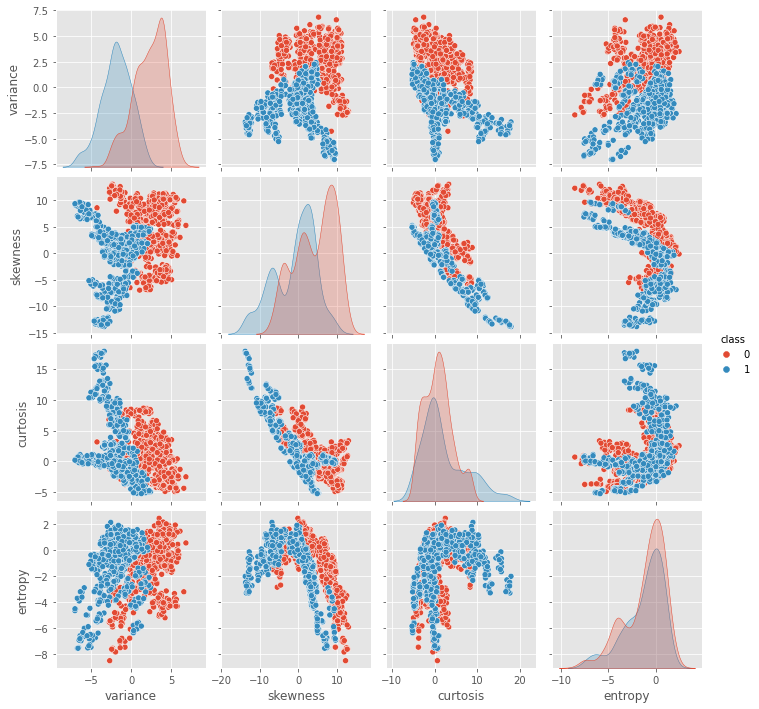

In [6]:
# Scatter plots and kdes
sns.pairplot(df, hue='class')

### Two Dimensions

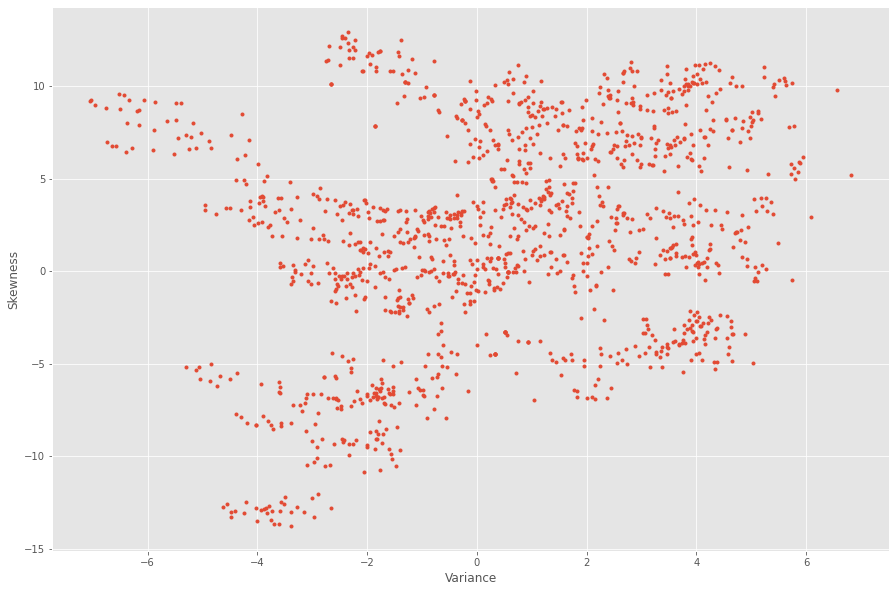

In [7]:
# New figure
fig, ax = plt.subplots()

# Scatter plot
ax.plot(df['variance'], df['skewness'], '.')

# Set axis labels
ax.set_xlabel('Variance');
ax.set_ylabel('Skewness');

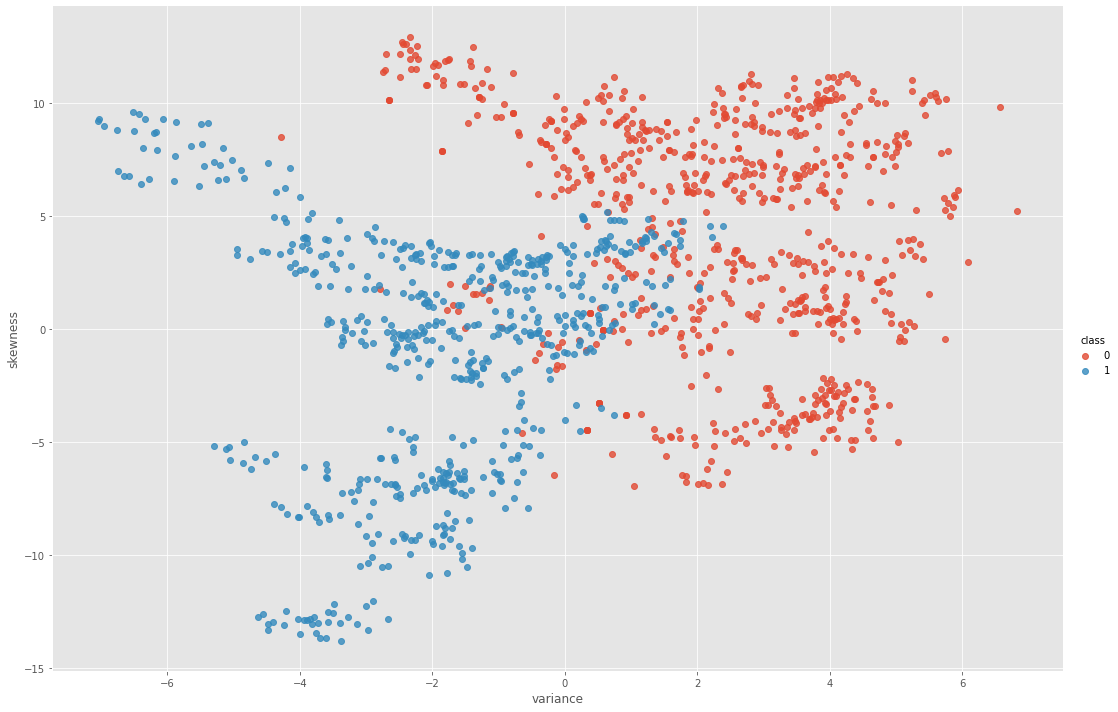

In [8]:
# Seaborn is great for creating complex plots with one command
sns.lmplot(x="variance", y="skewness", hue='class', data=df, fit_reg=False, height=10, aspect=1.5);

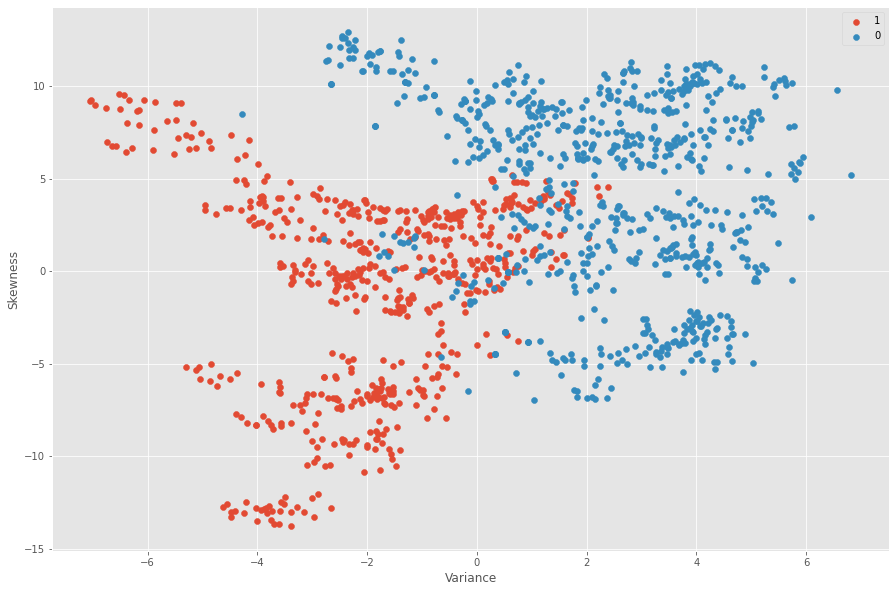

In [9]:
# Segregate the data.
variance = df[df['class'] == 1]
skewness = df[df['class'] == 0]


# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(variance['variance'], variance['skewness'], label='1')
ax.scatter(skewness['variance'], skewness['skewness'], label='0')


# Show the legend.
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

In [10]:
# How the segregation works
df['class'] == 1

0       False
1       False
2       False
3       False
4       False
        ...  
1367     True
1368     True
1369     True
1370     True
1371     True
Name: class, Length: 1372, dtype: bool

In [11]:
df[df['class'] == 1].head()

variance  skewness   curtosis  entropy  class
762  -1.39710   3.31910  -1.392700 -1.99480      1
763   0.39012  -0.14279  -0.031994  0.35084      1
764  -1.66770  -7.15350   7.892900  0.96765      1
765  -3.84830 -12.80470  15.682400 -1.28100      1
766  -3.56810  -8.21300  10.083000  0.96765      1

### Using groupby()

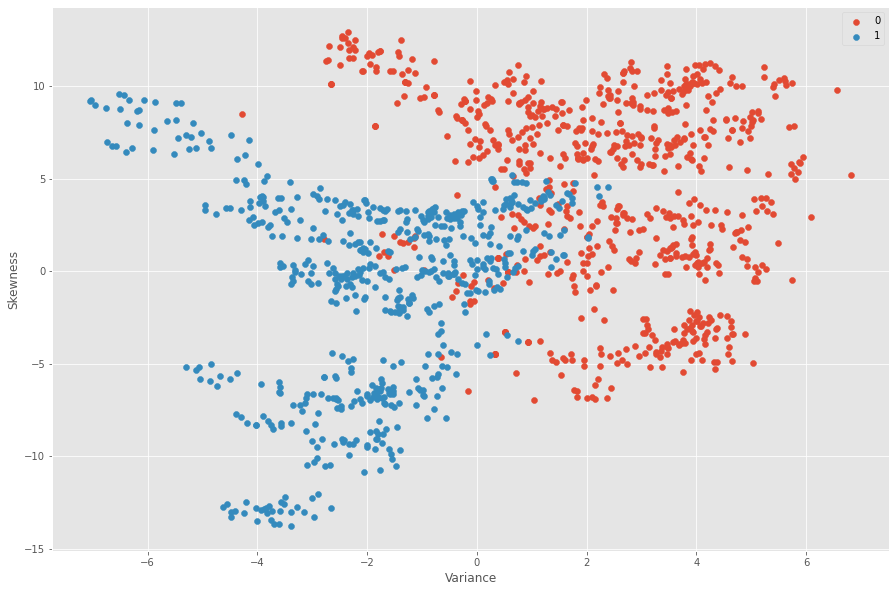

In [12]:
# New plot
fig, ax = plt.subplots()

# Using pandas groupby()
for preperation, data in df.groupby('class'):
    ax.scatter(data['variance'], data['skewness'], label=preperation)

# Show the legend
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

In [13]:
# Group by typically takes a categorical variable.
x = df.groupby('class')
x

In [14]:
# Pivot tables.
x.mean()

variance  skewness  curtosis   entropy
class                                        
0      2.276686  4.256627  0.796718 -1.147640
1     -1.868443 -0.993576  2.148271 -1.246641

In [15]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '0'
j looks like:
   variance  skewness  curtosis  entropy  class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0
2    3.8660   -2.6383    1.9242  0.10645      0


i is: '1'
j looks like:
     variance  skewness  curtosis  entropy  class
762  -1.39710   3.31910 -1.392700 -1.99480      1
763   0.39012  -0.14279 -0.031994  0.35084      1
764  -1.66770  -7.15350  7.892900  0.96765      1



### Test and Train Split

In [16]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [17]:
# Show some training data.
train.head()

variance  skewness  curtosis  entropy  class
1029   -1.2369   -1.6906   2.51800  0.51636      1
369     2.1948    1.3781   1.15820  0.85774      0
1218   -5.4414    7.2363   0.10938 -7.56420      1
1289   -1.4094   -2.1252  -0.10397 -0.19225      1
1243   -5.0676   -5.1877  10.42660 -0.86725      1

In [18]:
# The indices of the train array.
train.index

Int64Index([1029,  369, 1218, 1289, 1243, 1188,  713,  416, 1010,  868,
            ...
            1336,  685, 1071, 1262,  561, 1014,  212,  852,  189,  382],
           dtype='int64', length=1029)

In [19]:
# Show some testing data.
test.head()


variance  skewness  curtosis  entropy  class
1137   -1.5877   -6.6072   5.80220  0.31593      1
86     -1.1313    1.9037   7.53390  1.02200      0
292     4.1349    6.1189  -2.42940 -0.19613      0
193     4.8272    3.0687   0.68604  0.80731      0
732    -2.7143   11.4535   2.10920 -3.96290      0

In [20]:
test.index.size

343

### Two Dimensions: Inputs and Outputs

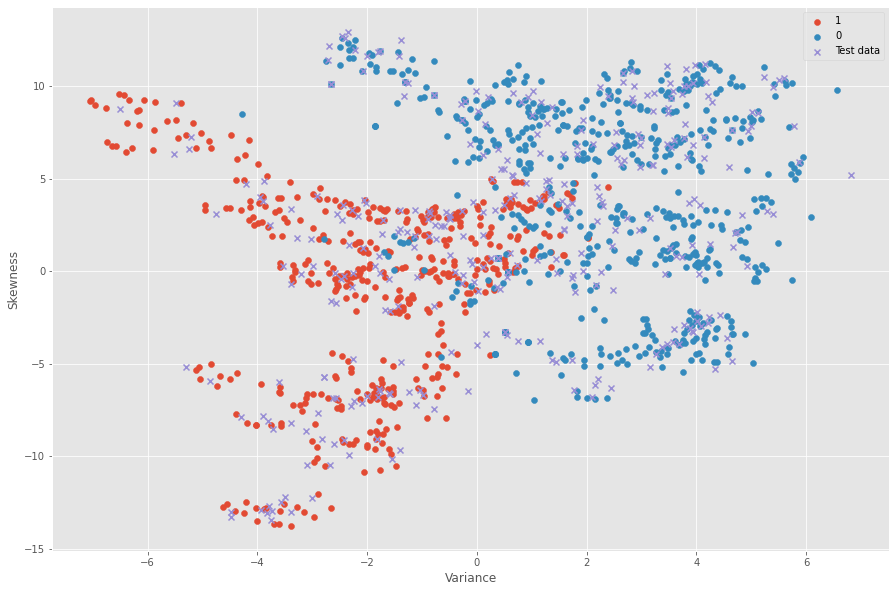

In [21]:
# Segregate the data.
setos = train[train['class'] == 1]
versi = train[train['class'] == 0]


# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['variance'], setos['skewness'], marker='o', label='1')
ax.scatter(versi['variance'], versi['skewness'], marker='o', label='0')

# Scatter plot for testing data.
ax.scatter(test['variance'], test['skewness'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

### Two Dimensions: Inputs and outputs

In [22]:
# Give the inputs and outputs convenient names
inputs, outputs = train[['variance', 'skewness']], train['class']

In [23]:
# Peek at the inputs.
inputs.head()

variance  skewness
1029   -1.2369   -1.6906
369     2.1948    1.3781
1218   -5.4414    7.2363
1289   -1.4094   -2.1252
1243   -5.0676   -5.1877

In [24]:
# Peek at the outputs.
outputs.head()

1029    1
369     0
1218    1
1289    1
1243    1
Name: class, dtype: int64

### Two Dimensions: Logistic regression

In [25]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0, solver='lbfgs', max_iter=5000)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(max_iter=5000, random_state=0)

In [26]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['variance', 'skewness']])
predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
# Eyeball the misclassifications.
predictions == test['class']

1137     True
86      False
292      True
193      True
732     False
        ...  
30      False
728      True
63       True
322     False
227     False
Name: class, Length: 343, dtype: bool

In [28]:
# What proportion were correct?
lre.score(test[['variance', 'skewness']], test['class'])

0.8862973760932945

In [29]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

variance  skewness  curtosis  entropy  class  predicted
1137   -1.5877   -6.6072   5.80220  0.31593      1          1
86     -1.1313    1.9037   7.53390  1.02200      0          1
292     4.1349    6.1189  -2.42940 -0.19613      0          0
193     4.8272    3.0687   0.68604  0.80731      0          0
732    -2.7143   11.4535   2.10920 -3.96290      0          1

In [30]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['class']]
misclass

variance  skewness  curtosis   entropy  class  predicted
86   -1.131300   1.90370   7.53390  1.022000      0          1
732  -2.714300  11.45350   2.10920 -3.962900      0          1
851   0.607310   3.95440  -4.77200 -4.485300      1          0
145   0.519500  -3.26330   3.08950 -0.984900      0          1
980   0.636550   5.20220  -5.21590 -6.121100      1          0
478  -1.778100   0.85460   7.13030  0.027572      0          1
285   1.774700  -6.43340   8.15000 -0.898280      0          1
790   1.164400   3.80950  -4.94080 -4.090900      1          0
1346  1.257200   4.87310  -5.28610 -5.874100      1          0
1339  1.551400   3.80130  -4.91430 -3.748300      1          0
1271 -0.071503   3.74120  -4.54150 -4.252600      1          0
7     2.092200  -6.81000   8.46360 -0.602160      0          1
604  -2.647900  10.13740  -1.33100 -5.470700      0          1
1034  0.678860   4.11990  -4.56900 -4.141400      1          0
1223  1.340300   4.13230  -4.70180 -2.598700      1          0
1224  0.268770   4.98700  -5.15080 -6.391300      1          0
1216  0.600500   0.99945  -2.21260  0.097399      1          0
925   1.742500   3.68330  -4.01290 -1.720700      1          0
26    1.143200  -3.74130   5.57770 -0.635780      0          1
919   0.895120   4.77380  -4.84310 -5.590900      1          0
716   0.519500  -3.26330   3.08950 -0.984900      0          1
326  -0.161080  -6.46240   8.35730 -1.521600      0          1
465  -2.698900  12.19840   0.67661 -8.548200      0          1
966   0.487970   3.56740  -4.38820 -3.811600      1          0
1353  0.115920   3.22190  -3.43020 -2.845700      1          0
277   1.363800  -4.77590   8.41820 -1.883600      0          1
1149  0.333250   3.31080  -4.50810 -4.012000      1          0
924   1.590400   2.21210  -3.11830 -0.117250      1          0
1345  2.227900   4.09510  -4.80370 -2.111200      1          0
421  -1.149700   1.29540   7.70100  0.626270      0          1
1100  1.437800   0.66837  -2.02670  1.027100      1          0
1101  2.194300   4.55030  -4.97600 -2.725400      1          0
1290  0.110320   1.97410  -3.36680 -0.652590      1          0
667  -0.048008  -0.56078   7.72150  0.453000      0          1
18    1.447900  -4.87940   8.34280 -2.108600      0          1
684  -2.075900  10.82230   2.64390 -4.837000      0          1
30   -0.248110  -0.17797   4.90680  0.154290      0          1
322  -1.734400   2.01750   7.76180  0.935320      0          1
227  -2.647900  10.13740  -1.33100 -5.470700      0          1

In [31]:
# Eyeball the descriptive statistics for the species.
train.groupby('class').mean()

variance  skewness  curtosis   entropy
class                                        
0      2.299325  4.113541  0.866128 -1.040919
1     -1.904567 -0.788962  2.026965 -1.221645

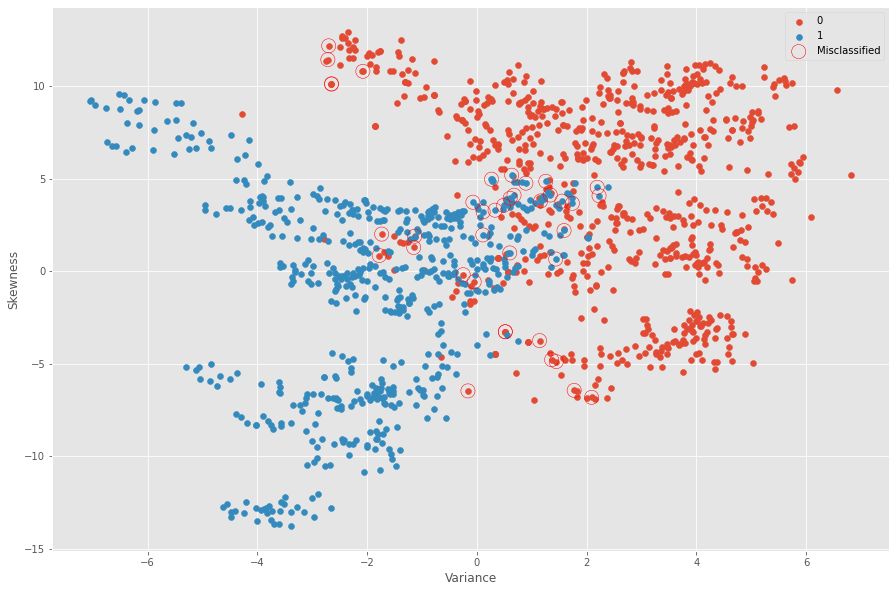

In [32]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('class'):
    ax.scatter(data['variance'], data['skewness'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['variance'], misclass['skewness'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

In [33]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/G00362038/master/BankNote_Authentication.csv")

In [34]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [35]:
# Use all four possible inputs.
inputs, outputs = train[['variance', 'skewness', 'curtosis', 'entropy']], train['class']

In [36]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [37]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['variance', 'skewness', 'curtosis', 'entropy']])
predictions

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [38]:
# Eyeball the misclassifications.
(predictions == test['class']).value_counts()

True     339
False      4
Name: class, dtype: int64

In [39]:
# What proportion were correct?
lre.score(test[['variance', 'skewness', 'curtosis', 'entropy']], test['class'])

0.9883381924198251

# Meanshift

http://jamesxli.blogspot.com/2012/03/on-mean-shift-and-k-means-clustering.html

# Overview
Meanshift is a popular unsupervised clustering algorithm. It may also be reffered to as the Mode-seeking algorithm as it assigns data points to clusters iteratively by shifting points towards the mode. The mode is the region containing the highest density of data points. Some examples of where the Mean-Shift algorithm is applied are the fields of computer vision, image processing and search engines.

## Advantages
- Meanshift is Model-Free as it does not need to assume any prior shape on data clusters.
- Only needs the window size (bandwidth) as a single parameter h
- Does not need a predetermined number of clusters as it uses the desnisty of points to generate the number of clusters.

## Disadvantages
- Output depends on window size
- It is cumputationally expensive as its process is calculation intensive.
- Excecution time can be rather slow for problems with a large nuber of data points

## How it works
1. Start with data points assigned to their own clusters
2. Computes all the centroids
3. Updates the location of the newly created centroids.
4. This proccess will be repeated moving the centroids to the higher density region
5. Finnaly, the process will be stopped once the centroids can no longer be moved further

## Image Segmentation: Meanshift 

Algorithm adapted and modified from https://medium.com/@muhammetbolat/image-segmentation-using-k-means-clustering-algorithm-and-mean-shift-clustering-algorithm-fb6ebe4cb761


In [40]:
import numpy as np
import pandas as pd
import cv2
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import filters
from skimage import util
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

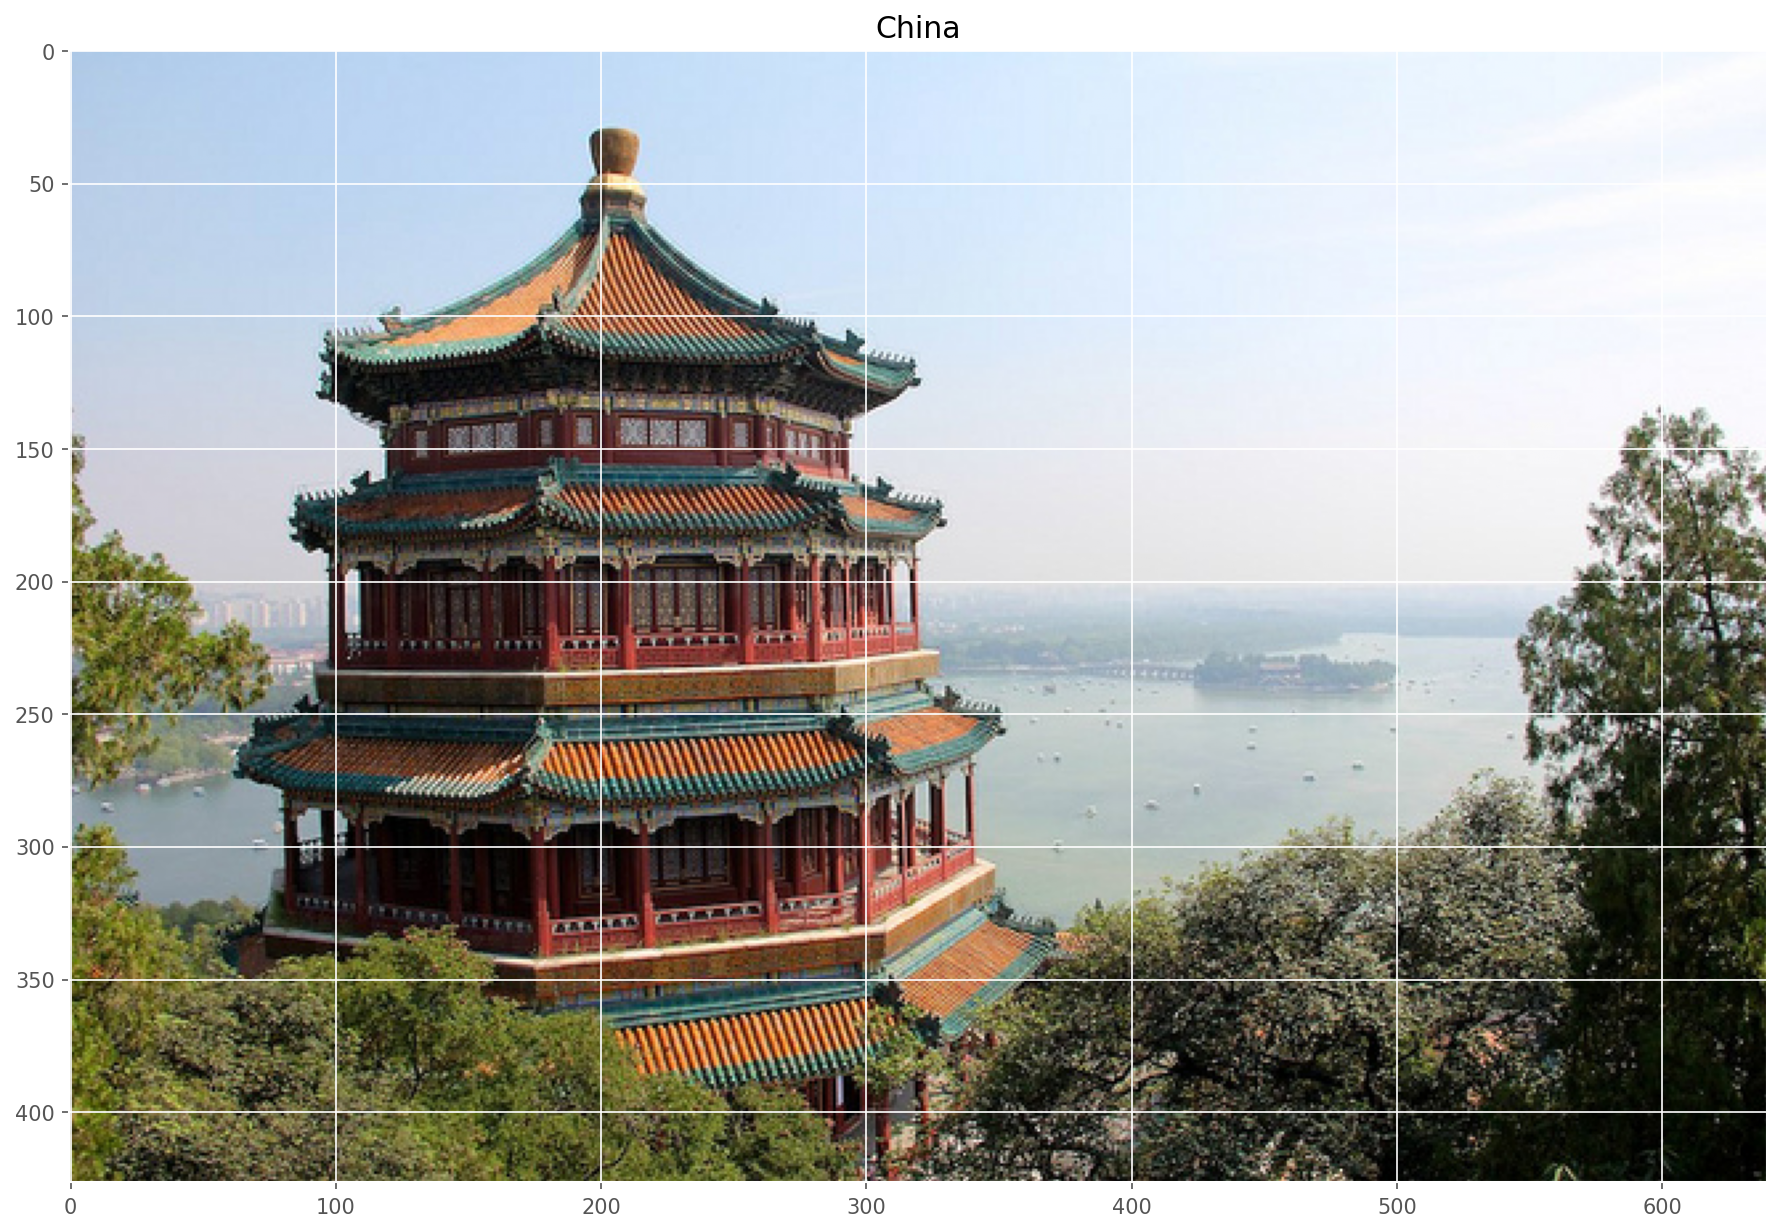

In [41]:
image = load_sample_image('china.jpg')
#image.squeeze().permute(1,2,0)
image = np.array(image, dtype=np.float64) / 255
reshape_img = np.reshape(image, [-1, 3])
plt.figure(dpi=150)
plt.title('China')
plt.imshow(image)

In [42]:
index = pd.MultiIndex.from_product(
    (*map(range, image.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None))

In [43]:
df_1 = pd.Series(image.flatten(), index=index)
df_1 = df_1.unstack()
df_1 = df_1.reset_index().reindex(columns=['col','row',   'r','g','b'])
df_1.head(10)

col  row         r         g         b
0    0    0  0.682353  0.788235  0.905882
1    1    0  0.682353  0.788235  0.905882
2    2    0  0.682353  0.788235  0.905882
3    3    0  0.682353  0.788235  0.905882
4    4    0  0.682353  0.788235  0.905882
5    5    0  0.682353  0.788235  0.905882
6    6    0  0.682353  0.788235  0.905882
7    7    0  0.682353  0.788235  0.905882
8    8    0  0.678431  0.792157  0.909804
9    9    0  0.674510  0.788235  0.905882

In [44]:
df_2 = df_1[['r', 'g', 'b']]
df_2.head(10)

r         g         b
0  0.682353  0.788235  0.905882
1  0.682353  0.788235  0.905882
2  0.682353  0.788235  0.905882
3  0.682353  0.788235  0.905882
4  0.682353  0.788235  0.905882
5  0.682353  0.788235  0.905882
6  0.682353  0.788235  0.905882
7  0.682353  0.788235  0.905882
8  0.678431  0.792157  0.909804
9  0.674510  0.788235  0.905882

In [45]:
nd_1 = df_1.values.astype(np.float32)
nd_1[:, 0] = nd_1[:, 0] / (nd_1[:, 0].max() + 1)
nd_1[:, 1] = nd_1[:, 1] / (nd_1[:, 1].max() + 1)
nd_1[:, 2:] = nd_1[:, 2:] / 255
nd_2 = df_2.astype(np.float64) / 255

In [46]:
nd_1 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_1)
nd_2 = MinMaxScaler(feature_range=(0, 10)).fit_transform(df_2)


In [ ]:
bandwidth_1 = estimate_bandwidth(nd_1, quantile=0.4, n_samples=3000)
bandwidth_2 = estimate_bandwidth(nd_1, quantile=0.4, n_samples=3000)

In [ ]:
ms_1 = MeanShift(bandwidth = bandwidth_1 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_1)
ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_2)

In [ ]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image', loc='center')
plt.imshow(image)

In [ ]:
w, h, d = original_shape = tuple(image.shape)
print(w + h)

In [ ]:
plt.figure(2)
plt.clf()
plt.axis('off')

res = recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h)

# plt.imshow(recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h))

shape = image.shape
labels = ms_1.labels_
result_image = np.reshape(labels, shape[:2])

plt.imshow(result_image)



In [ ]:
plt.figure(2)
plt.clf()
plt.axis('off')

# res = recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h)

# plt.imshow(recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h))

shape = image.shape
labels = ms_2.labels_
result_image = np.reshape(labels, shape[:2])

plt.imshow(result_image)

## Regression: Real Estate Dataset

Data set used can be found at https://www.kaggle.com/quantbruce/real-estate-price-prediction/code



In [ ]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

In [ ]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Load the dataset  
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/EmergingTechProject/main/Datasets/Real%20estate.csv")

In [ ]:
# Have a look at the data.
df

In [ ]:
# Summary statistics
df.describe()

### Visualising Data

In [ ]:
# Scatter plots and kdes
sns.pairplot(df, hue='Y house price of unit area');

In [ ]:
#Plot figsize
plt.figure(figsize=(12, 8))
# Generate heat map
sns.heatmap(df.corr(),annot=True,cmap="RdGy")

In [ ]:
x = df['X3 distance to the nearest MRT station']
y = df['X4 number of convenience stores']
x , y

In [ ]:
y.describe()

In [ ]:
X = df.iloc[: , :-1].values
y = df.iloc[:, 7]
df.head()

In [ ]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)


In [ ]:
# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

In [ ]:
# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

In [ ]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

In [ ]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [ ]:
# Look at y.
y

In [ ]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

In [ ]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

In [ ]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

### Linear Regression: Test and Train Split

Adapted from https://www.kaggle.com/kavitjigneshshah/linear-regression#Splitting-the-Data

In [ ]:
#Splitting the data into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state = 0)

In [ ]:
#Fitting Multiple Linear Regression Model into Training Set
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

In [ ]:
#Predicting the Test Set Results
y_pred = model_fit.predict(X_test)
y_pred

In [ ]:
#Calculating the coefficients
print(model_fit.coef_)

In [ ]:
#Calculating the intercept
print(model_fit.intercept_)

In [ ]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

### Multiple Linear Regression
Let's try multiple linear regression using sklearn. https://scikit-learn.org/stable/

In [ ]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [ ]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [ ]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [ ]:
df

In [ ]:
# Let's pretend we want to do linear regression on these variables to predict house price.
x = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

In [ ]:
# Here's petal width.
y = df['Y house price of unit area']

In [ ]:
# Ask our model to fit the data.
m.fit(x, y)

In [ ]:
# Here's our intercept.
m.intercept_

In [ ]:
# Here's our coefficients, in order.
m.coef_

In [ ]:
# See how good our fit is.
m.score(x, y)

### Using statsmodels

In [ ]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())